## Introduction

The data will be used to predict whether a customer of the bank will churn. If a customer churns, it means they left the bank and took their business elsewhere. The goal is to predict which customers are likely to churn then take measures to retain them before they do.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_original = pd.read_csv('Churn_Modelling.csv')
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The data dictionary shows that there is a column called `Exited`. This is a Boolean value that indicates whether or not a customer left the bank (0 = did not leave, 1 = did leave). The model should predict whether they should have a 0 or a 1 in the `Exited` column.

This is a supervised learning classification task because we will predict on a binary class. Therefore, this notebook will prepare the data for a classification model.

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From this table, we can confirm that the data has 14 features and 10,000 observations. We also know that nine features are integers, two are floats, and three are strings. Finally, we can tell that there are no null values because there are 10,000 observations, and each column has 10,000 non-null values.

### Feature selection

Column `RowNumber`, `CustomerID`, `Surname` are removed them from the modeling dataset because they cannot be expected to have any influence over the target variable

For ethical reasons, we should remove the `Gender` column. we don't want our model-making predictions (and therefore, offering promotions/financial incentives) based on a person's gender.

In [5]:
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], axis=1)
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


### Feature transformation

Our dataset has one categorical feature: `Geography`. Classification models generally need categorical variables to be encoded.

In [6]:
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
churn_df = pd.get_dummies(churn_df, drop_first=True)
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


# Naive Bayes 

In [8]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
churn_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

put 25% of the data into our test set, and use the remaining 75% to train the model

In [10]:
# Define the y (target) variable
y = churn_df['Exited']

# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [11]:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [12]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.788
Precision: 0.356
Recall: 0.051
F1 Score: 0.089


recall, and F1 scores aren’t very good.

In [13]:
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.250900,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.433553,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


Something that stands out is that the `Teure` variable is on a vastly different scale than some of the other variables we have, such as `Balance` or `EstimatedSalary`.

In [14]:
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Instantiate the scaler
scaler = MinMaxScaler()

In [16]:
# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train_encode = scaler.transform(X_train)

# Scale the test data
X_test_encode = scaler.transform(X_test)

In [17]:
X_train_encode[0]

array([0.77      , 0.47297297, 0.8       , 0.55719027, 0.33333333,
       0.        , 1.        , 0.85229814, 0.        , 0.        ])

fit our model, only this time we'll fit it to our new scaled data.

In [18]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train_encode, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test_encode)

In [19]:
table = pd.DataFrame()
result_table = table.append({'Model': 'Naive Bayes ',
                    'F1': '%.3f' % f1_score(y_test, scaled_preds),
                    'Recall': '%.3f' % recall_score(y_test, scaled_preds),
                    'Precision': '%.3f' % precision_score(y_test,scaled_preds),
                    'Accuracy': '%.3f' % accuracy_score(y_test, scaled_preds)
                    },
                    ignore_index=True
                    )

result_table

C:\Users\lambert\AppData\Local\Temp\ipykernel_14120\2303329808.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = table.append({'Model': 'Naive Bayes ',


,Model,F1,Recall,Precision,Accuracy
0,Naive Bayes,0.433,0.336,0.609,0.821


In [20]:
result_table.to_csv("Results.csv")

## Select an evaluation metric 

Since we have some imbalance in our target classes, we know that if we measure model performance by accuracy alone, the model could predict 0 (no churn) 100% of the time and have an accuracy of ~80%. An accuracy of 80% might seem pretty good, but we know in this case it would be meaningless, because our model would fail to identify anybody who churned. Therefore, accuracy is not the best metric to use to evaluate our model's performance.

To determine which evaluation metric might be best, consider how our model might be wrong. There are two possibilities for bad predictions: 
  
  - **False positives:** When the model predicts a customer **will** churn when in fact they won't
  - **False negatives:** When the model predicts a customer will **not** churn when in fact they will     

  

`Precision` represents the percentage of all our model's predicted positives that are true positives. This might not be the best metric for us to use, because it disincentivizes predicting someone will churn unless there is a high degree of certainty that they will. This could translate to a high rate of false negatives.

On the other hand, `recall` represents the percentage of all actual positives that the model identifies as such. This also might not be the best metric to use, because it rewards predicting someone will churn even if the likelihood of their doing so is very small. This could translate to a high rate of false positives.

To determine false positives or false negatives. we consider the error that would cost the bank more money, by calculating the average balance of all customers who churned.

In [21]:
avg_churned_bal = df_original[df_original['Exited']==1]['Balance'].mean()
avg_churned_bal

91108.53933726068

This shows that the customers who churned each took with them €91,108.54, on average. That's a lot of money! This represents the average cost of the model predicting a `false negative`. 

Since correctly identifying customers who will churn is potentially very valuable, we could select `recall` as our most important metric. This might be a perfectly valid approach, depending on the specifics of the campaign. But this could also be problematic. After all, if we select a model based solely on recall, we could select a very biased model that predicts everyone to churn, but then 8,000 people would be given incentives needlessly.  

Since we don't know the exact cost of predicting a false negative, We'll assume that a metric that balances precision and recall is best. The metric that helps us achieve this balance is `F1 score`, which is defined as the harmonic mean of precision and recall.


In [22]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

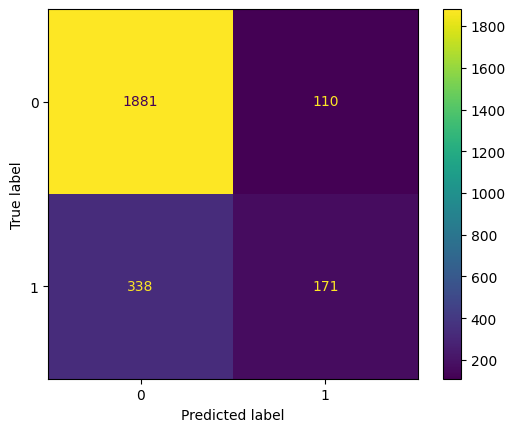

In [23]:
conf_matrix_plot(gnb_scaled, X_test_encode, y_test)

What stands out most in the confusion matrix is that the model misses a lot of customers who will churn. In other words, there are a lot of false negatives&mdash;338, to be exact. This is why the recall score is only 0.336. 

we'd certainly want to develop other models to see if they perform better.

# Decision tree
Let's build and test a decision tree model that uses banking data to predict whether a customer will churn. If a customer churns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

In [25]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [26]:
dt_result_table = table.append({'Model': 'Decision tree',
                    'F1': '%.3f' % f1_score(y_test, dt_pred),
                    'Recall': '%.3f' % recall_score(y_test, dt_pred),
                    'Precision': '%.3f' % precision_score(y_test, dt_pred),
                    'Accuracy': '%.3f' % accuracy_score(y_test, dt_pred)
                    },
                    ignore_index=True
                    )

dt_result_table

C:\Users\lambert\AppData\Local\Temp\ipykernel_14120\515570676.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt_result_table = table.append({'Model': 'Decision tree',


,Model,F1,Recall,Precision,Accuracy
0,Decision tree,0.494,0.503,0.486,0.790


In [27]:
results = pd.read_csv('results.csv', index_col=0)

In [28]:
results = pd.concat([dt_result_table, results])
results

,Model,F1,Recall,Precision,Accuracy
0,Decision tree,0.494,0.503,0.486,0.790
0,Naive Bayes,0.433,0.336,0.609,0.821


A comparison of F1 scores reveals that the decision tree is an improvement to the Naive Bayes model we built earlier.

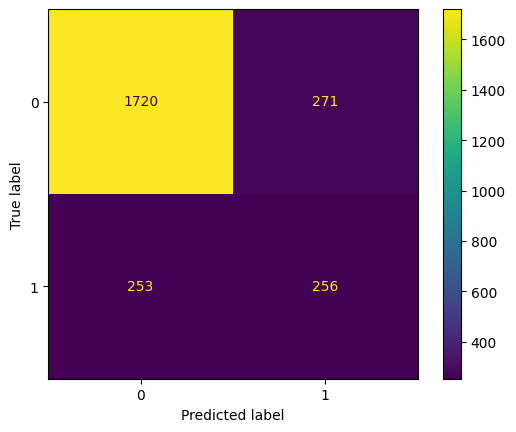

In [29]:
conf_matrix_plot(decision_tree, X_test, y_test)

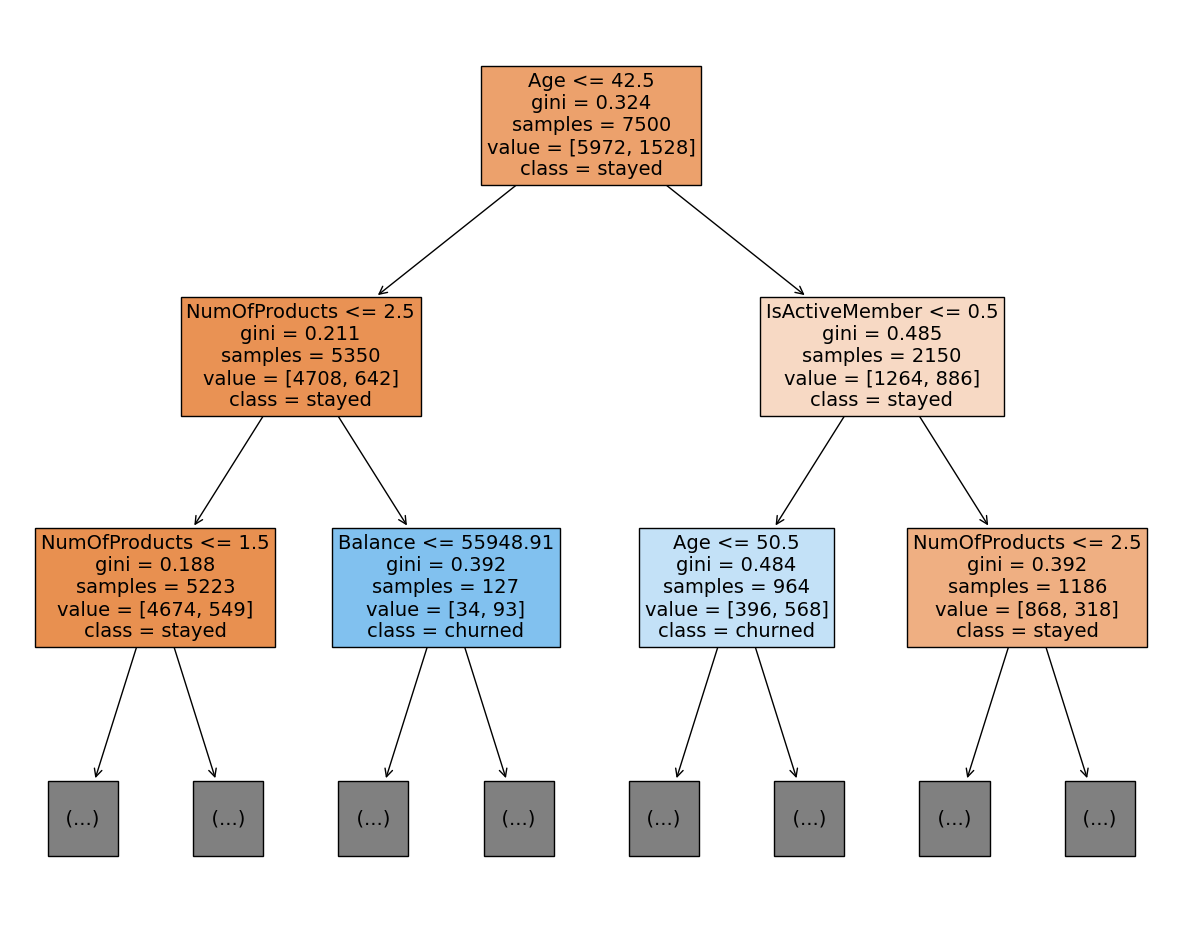

In [30]:
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

The first line of information in each node is the feature and split point that the model identified as being most predictive. For this root node, the question was:  _Is the customer less than or equal to 42.5 years old?_

`gini` refers to the node's _Gini impurity_. This is a way of measuring how "pure" a node is. The value can range from 0 to 0.5. A Gini score of 0 means there is no impurity.

`samples` is simply how many samples are in that node.

`value` indicates how many of each class are in the node. The `value = [5972, 1528]` tells us that 5,972 customers in this node stayed (y=0) and 1,528 customers churned (y=1).

`class` tells us the majority class of the samples in each node.

# Tune and validate decision trees

 Using `GridSearchCV` to tune the following hyperparameters with cross-validation:
  - `max_depth`
  - `min_samples_leaf`

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

Ceate a dictionary of hyperparameters to search over:

  - key = name of hyperparameter (string)
  - value = values to search over (list)

In [33]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

In [34]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

* Instantiate the `GridSearchCV` object. Pass as arguments:
  - The classifier (`tuned_decision_tree`)
  - The dictionary of hyperparameters to search over (`tree_para`)
  - The set of scoring metrics (`scoring`)
  - The number of cross-validation folds you want (`cv=5`)
  - The scoring metric that you want GridSearch to use when it selects the "best" model (i.e., the model that performs best on average over all validation folds) (`refit='f1'`*)

In [35]:
%%time
# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

# Fit the model
clf.fit(X_train, y_train)

CPU times: total: 11.3 s
Wall time: 11.4 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1', scoring={'accuracy', 'recall', 'f1', 'precision'})

In [36]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=42)

a max depth of 8 and a min samples leaf of 5 was best when using the F1 score as a measure

return the best recall score

In [37]:
clf.best_score_

0.5606550690451619

In [38]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table

In [39]:
tdt_result_table = make_results("Tuned Decision Tree", clf)
tdt_result_table

C:\Users\lambert\AppData\Local\Temp\ipykernel_14120\2409802599.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.560655,0.469255,0.701608,0.8504


In [40]:
results = pd.concat([tdt_result_table, results])
results

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.560655,0.469255,0.701608,0.8504
0,Decision tree,0.494,0.503,0.486,0.790
0,Naive Bayes,0.433,0.336,0.609,0.821


These results show that our model's performance isn't great, but it's not terrible either. Maybe another kind of model will do better

# Random forest
Construct and validate a random forest ensemble model

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [205]:
%%time

# Instantiate the classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to search over
cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

# Create a set of scoring metrics to capture.
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Use five folds cross-validation
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

#fit in the model
rf_cv.fit(X_train, y_train)


CPU times: total: 43min 14s
Wall time: 43min 48s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring={'accuracy', 'f1', 'recall', 'precision'})

This models take a long time to fit. Use `pickle` to save the fit model object to a specified location, then quickly reads it back in.

In [43]:
# Define a path to the folder where you want to save the model
path = '/Users/lambert/Desktop/data_analyst/Machine learning/'

In [207]:
# Pickle the model
with open(path+'rf_cv_model.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [44]:
# Read in pickled model
with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [45]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 125}

In [46]:
rf_cv.best_score_

0.580528563620339

In [47]:
rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

C:\Users\lambert\AppData\Local\Temp\ipykernel_14120\2409802599.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.580529,0.472517,0.756289,0.861333


In [48]:
results = pd.concat([rf_cv_results, results])
results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.580529,0.472517,0.756289,0.861333
0,Tuned Decision Tree,0.560655,0.469255,0.701608,0.8504
0,Decision tree,0.494,0.503,0.486,0.790
0,Naive Bayes,0.433,0.336,0.609,0.821


Build another random forest model and tune the hyperparameters using a separate validation dataset.

Use `train_test_split` to divide `X_train` and `y_train` into 80% training data (`X_tr`, `y_tr`) and 20% validation data (`X_val`, `y_val`).

In [49]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                            stratify=y_train, random_state=10)

This time we don't want `GridSearchCV` split the data into five folds for cross-validation. we're going to tell it exactly which rows of `X_train` are for training, and which rows are for validation.

In [50]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]

looks at the index number of each row in `X_train`. If that index number is in `X_val`'s list of index numbers, then the list comprehension appends a 0. If it's not, then it appends a -1.

In [51]:
from sklearn.model_selection import PredefinedSplit

 This function is what allows us to pass the list we just made to `GridSearchCV`.

In [52]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

custom_split = PredefinedSplit(split_index)

rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='f1')

In [217]:
%%time
rf_val.fit(X_train, y_train)

CPU times: total: 9min 5s
Wall time: 9min 13s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring={'accuracy', 'f1', 'recall', 'precision'})

In [218]:
with open(path+'rf_val_model.pickle', 'wb') as to_write:
    pickle.dump(rf_val, to_write)

In [53]:
with open(path+'rf_val_model.pickle', 'rb') as to_read:
    rf_val = pickle.load(to_read)

In [54]:
rf_val.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [55]:
rf_val_results = make_results('Random Forest Validated', rf_val)

C:\Users\lambert\AppData\Local\Temp\ipykernel_14120\2409802599.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


In [56]:
results = pd.concat([rf_val_results, results])
results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest Validated,0.57551,0.460784,0.766304,0.861333
0,Random Forest CV,0.580529,0.472517,0.756289,0.861333
0,Tuned Decision Tree,0.560655,0.469255,0.701608,0.8504
0,Decision tree,0.494,0.503,0.486,0.790
0,Naive Bayes,0.433,0.336,0.609,0.821


# XGBoost tuning 

construct and interpret an XGBoost classification model using the XGBoost modeling library.

In [57]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [58]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }    

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [44]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 53min 31s
Wall time: 8min 42s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring={'precision', 'accuracy', 'f1', 'recall'})

In [45]:
with open(path + 'xgb_cv_model.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write) 

In [59]:
with open(path+'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [60]:
xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

C:\Users\lambert\AppData\Local\Temp\ipykernel_14120\2409802599.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.583825,0.482342,0.744089,0.8604


In [61]:
results = pd.concat([xgb_cv_results, results])
results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.583825,0.482342,0.744089,0.8604
0,Random Forest Validated,0.57551,0.460784,0.766304,0.861333
0,Random Forest CV,0.580529,0.472517,0.756289,0.861333
0,Tuned Decision Tree,0.560655,0.469255,0.701608,0.8504
0,Decision tree,0.494,0.503,0.486,0.790
0,Naive Bayes,0.433,0.336,0.609,0.821


In [62]:
results.to_csv("Results.csv")

## Model selection and final results

XGBoost model has the top F1 score on the validation data by a small margin, so this is the champion model. Let's predict on the test data

In [63]:
xgb_cv_preds = xgb_cv.predict(X_test)
print('F1 score final XGB model: ', f1_score(y_test, xgb_cv_preds))
print('Recall score final XGB model: ', recall_score(y_test, xgb_cv_preds))
print('Precision score final XGB model: ', precision_score(y_test, xgb_cv_preds))
print('Accuracy score final XGB model: ', accuracy_score(y_test, xgb_cv_preds))

F1 score final XGB model:  0.6059171597633135
Recall score final XGB model:  0.5029469548133595
Precision score final XGB model:  0.7619047619047619
Accuracy score final XGB model:  0.8668


The final model performed even better on the test data than it did on the validation data.

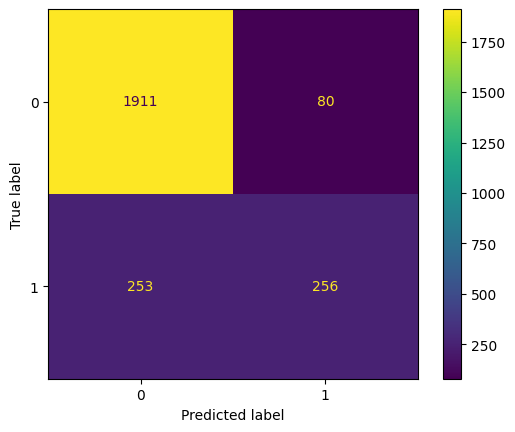

In [64]:
conf_matrix_plot(xgb_cv, X_test, y_test)

From the 2,500 people in our test data, there are 509 customers who left the bank. Of those, our model captures 256, whether these results are acceptable depends on the costs of the measures taken to prevent a customer from leaving versus the value of retaining them. In this case, bank leaders may decide that they’d rather have more true positives, even if it means also capturing significantly more false positives. If so, perhaps optimizing the models based on their F1 scores is insufficient. Maybe we’d prioritize on recall instead. 

In any case, what is certain is that our model helps the bank. Consider the results if decision-makers had done nothing. In that case, they’d expect to lose 509 customers. Alternatively, they could give everybody an incentive to stay. That would cost the bank for each of the 2,500 customers in our test set. Finally, the bank could give incentives at random&mdash;say, by flipping a coin. Doing this would incentivize about the same number of true responders as our model selects. But the bank would lose a lot of money offering the incentives to people who aren’t likely to leave, and our model is very good at identifying these customers. 


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

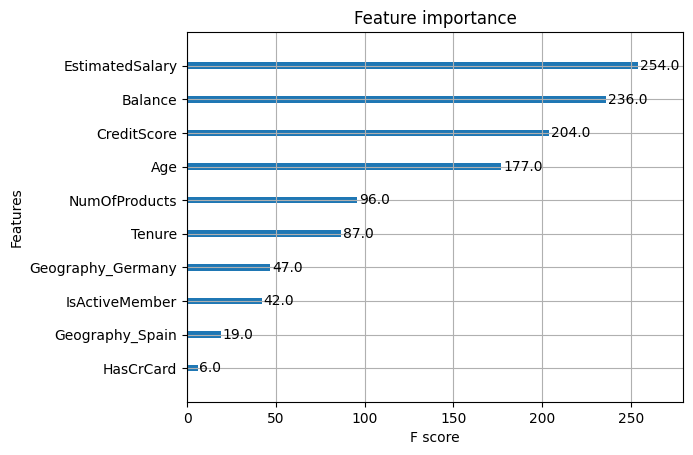

In [65]:
plot_importance(xgb_cv.best_estimator_)

Four most important features used by our model were `EstimatedSalary`, `Balance`, `CreditScore`, and `Age`.